# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

# Answers Below
Parts of the answers are in bold

 **Part 1 - Summary of Topic** 
Please note that Sanjana A and I will be working as a team on this project. 
The topic that we are interested in exploring is where food deserts are spatially located with respect to access to public transportation within the nine bay area counties. 
We are also curious to explore neighborhood characteristics/demographics surrounding these food deserts. 


 **Part 2 - Datasets To Explore**
We are hoping to use  at USDA Food Access Research Atlas, American Community Survey, Cal-Adapt, and California State data.  






**Part 3 - Reading in Data**

In [3]:
#Part 3 Reading in Data
import pandas as pd
food_access = pd.read_csv('FoodAccess2019_BayArea.csv')
food_access.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,6001400100,California,Alameda County,1,2937,1314,0,2,0.07,0,...,634,2161,142,456,9,4,165,117,28,0
1,6001400200,California,Alameda County,1,1974,856,0,70,3.55,0,...,323,1659,33,147,0,4,131,151,59,0
2,6001400300,California,Alameda County,1,4865,2418,0,40,0.82,0,...,493,3468,518,423,5,17,434,399,423,38
3,6001400400,California,Alameda County,1,3703,1779,0,33,0.89,0,...,353,2628,456,278,6,14,321,332,157,115
4,6001400500,California,Alameda County,1,3517,1578,0,126,3.58,0,...,314,1905,955,209,5,27,416,340,188,51


In [4]:
#Choosing specific columns to create a new dataframe
selected_columns = ['CensusTract', 
                    'County', 
                    'LowIncomeTracts', 
                    'MedianFamilyIncome', 
                    'PovertyRate', 
                    'lapop1', 
                    'laseniors1', 
                    'lahunv1', 
                    'lapop10', 
                    'TractLOWI', 
                    'TractSNAP', 
                    'TractHUNV']
new_fa = food_access[selected_columns]
new_fa.head()

,CensusTract,County,LowIncomeTracts,MedianFamilyIncome,PovertyRate,lapop1,laseniors1,lahunv1,lapop10,TractLOWI,TractSNAP,TractHUNV
0,6001400100,Alameda County,0,220486.0,3.6,1711.0,361.0,17.0,NaN,312,0,28
1,6001400200,Alameda County,0,233625.0,6.5,NaN,NaN,NaN,NaN,230,0,59
2,6001400300,Alameda County,0,166875.0,5.3,NaN,NaN,NaN,NaN,526,38,423
3,6001400400,Alameda County,0,141250.0,11.3,NaN,NaN,NaN,NaN,802,115,157
4,6001400500,Alameda County,0,134583.0,11.9,NaN,NaN,NaN,NaN,809,51,188


In [6]:
#Part 3 - Taking out the Outliers and reshaping the dataframe
low = new_fa['MedianFamilyIncome'].dropna().quantile(.01)
print(low)

34211.85


In [7]:
high = new_fa['MedianFamilyIncome'].dropna().quantile(.99)
print(high)

250001.0


In [68]:
# Removing outliers by IQR method
Q1 = new_fa[['MedianFamilyIncome', 'PovertyRate']].quantile(0.25)
Q3 = new_fa[['MedianFamilyIncome', 'PovertyRate']].quantile(0.75)
IQR = Q3 - Q1

new_fa = new_fa[~((new_fa[['MedianFamilyIncome', 'PovertyRate']] < (Q1 - 1.5 * IQR)) | (new_fa[['MedianFamilyIncome', 'PovertyRate']] > (Q3 + 1.5 * IQR))).any(axis=1)]


**Part 4 - Using Groupby Functions**

In [27]:
# Part 4 Using Group by Functions to Explore the data 
new_fa.groupby(['County', 'LowIncomeTracts'])['TractSNAP'].mean().unstack()

LowIncomeTracts,0,1
County,,
Alameda County,47.062201,164.296296
Contra Costa County,58.346774,190.802817
Marin County,41.460000,140.000000
Napa County,49.531250,90.857143
San Francisco County,53.183824,136.615385
San Mateo County,35.654135,194.478261
Santa Clara County,43.923954,168.530000
Solano County,105.223881,189.818182
Sonoma County,94.215190,247.842105


In [69]:
new_fa.groupby(['County', 'LowIncomeTracts'])['lapop1'].mean().unstack()

LowIncomeTracts,0,1
County,,
Alameda County,1415.212500,794.647059
Contra Costa County,2110.230000,1453.433333
Marin County,1140.270270,0.000000
Napa County,1352.846154,NaN
San Francisco County,87.833333,635.000000
San Mateo County,1511.428571,44.750000
Santa Clara County,1587.585859,524.105263
Solano County,1863.000000,1115.571429
Sonoma County,1757.338462,1305.333333


<AxesSubplot:title={'center':'Average Number of Housing Units Receiving SNAP by County and If Located In a Low-Income Tract'}, xlabel='Non Low Income Tract (0) vs. Low Income Tract (1) ', ylabel='SNAP Participation by Housing Units'>

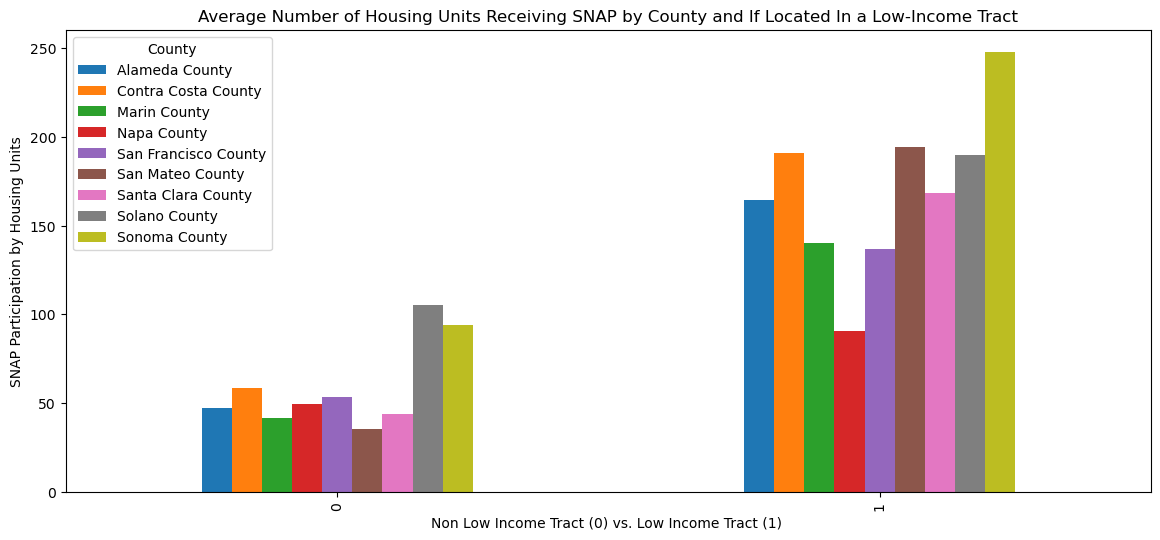

In [29]:
#Part 4 and Part 5; using group by Function and creating a visual
#Data visual 1
new_fa.groupby(['LowIncomeTracts', 'County'])['TractSNAP'].mean().unstack(level=1).plot(kind='bar', figsize=(14,6), title='Average Number of Housing Units Receiving SNAP by County and If Located In a Low-Income Tract', ylabel='SNAP Participation by Housing Units', xlabel='Non Low Income Tract (0) vs. Low Income Tract (1) ')

<AxesSubplot:xlabel='LowIncomeTracts', ylabel='TractSNAP'>

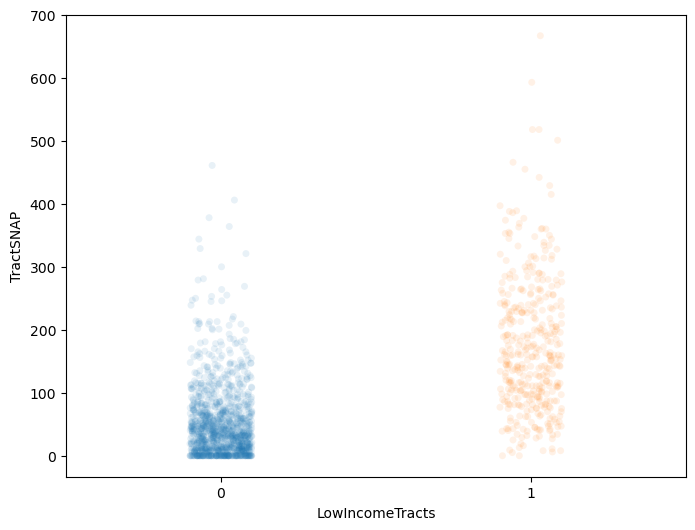

In [39]:
#Data visual 2
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=new_fa, x='LowIncomeTracts', y='TractSNAP', alpha=0.1, ax=ax)

<AxesSubplot:xlabel='TractSNAP', ylabel='Density'>

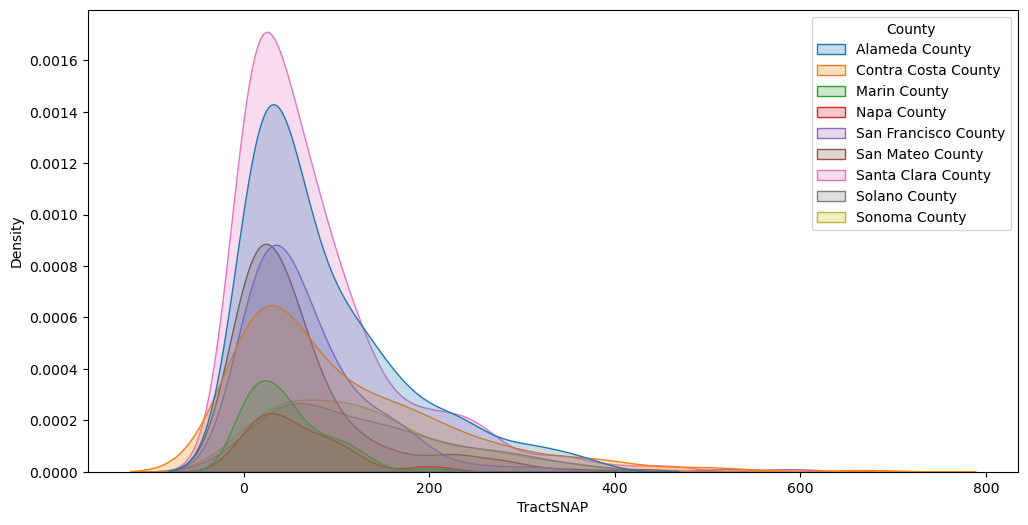

In [50]:
# Part 5
#Data visual 3
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=new_fa, x="TractSNAP", hue='County', fill=True, ax=ax)

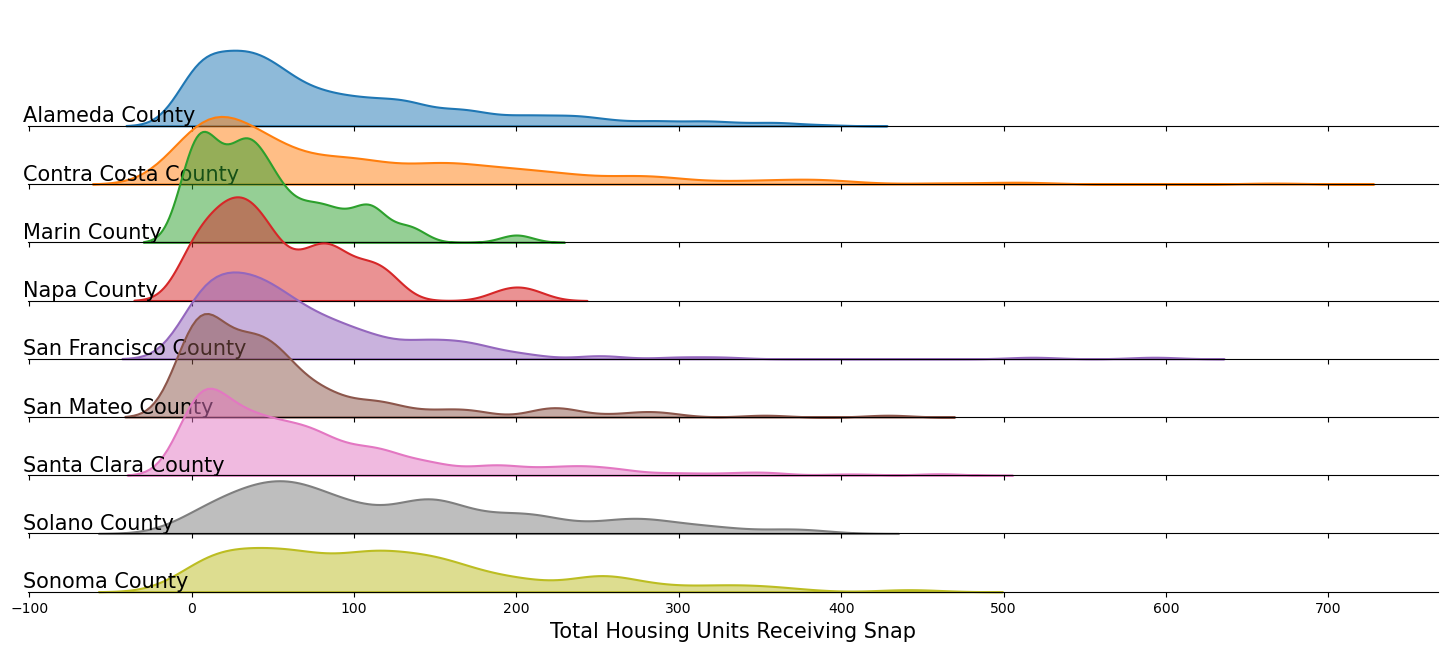

In [42]:
#Part 5
# data visual 4
from matplotlib import rcParams

with sns.axes_style({"style": "white", "axes.facecolor": (0, 0, 0, 0)}):
    g = sns.FacetGrid(new_fa, row="County", hue="County", aspect=20, height=.75)
    g.map(sns.kdeplot, "TractSNAP",
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=.5, linewidth=1.5)
    g.figure.subplots_adjust(hspace=-.5)
    g.set_titles("")
    g.set(yticks=[])
    g.despine( left=True)
    g.set_axis_labels("Total Housing Units Receiving Snap", "", fontsize=15)
    g.set_titles(row_template='{row_name}')
    for ax in g.axes:
        title = ax[0].get_title()
        ax[0].set_title("")
        ax[0].set_ylabel(title, rotation=0, loc='bottom', labelpad=0)

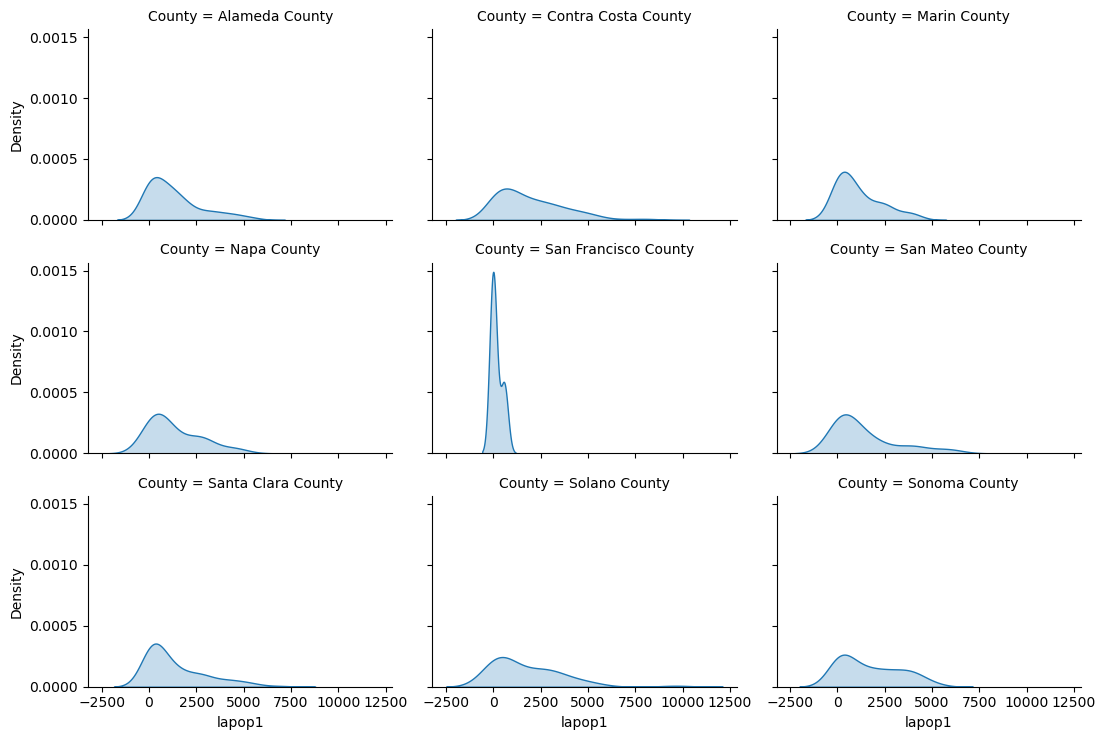

In [86]:
#data visual 5
g = sns.FacetGrid(new_fa, col="County", col_wrap=3, height=2.5, aspect=1.5)
g.map(sns.kdeplot, "lapop1", fill=True)

<AxesSubplot:xlabel='County'>

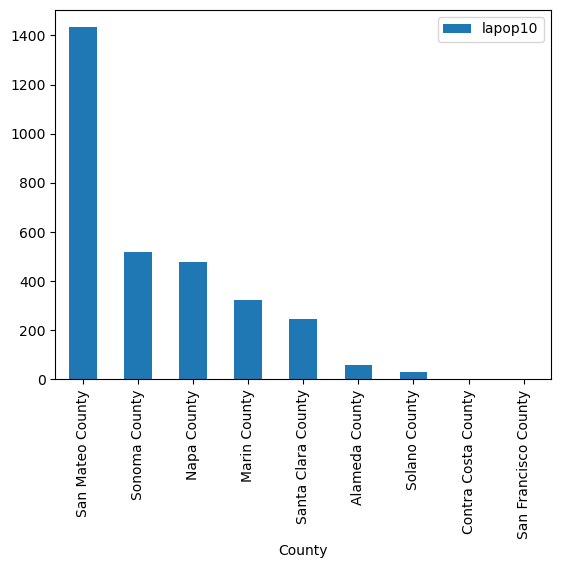

In [92]:
county_lapop1 = new_fa.groupby(
    new_fa['County'])[['lapop10']].mean().sort_values(by='lapop10', ascending=False)
county_lapop1.plot(kind='bar')

<AxesSubplot:xlabel='County'>

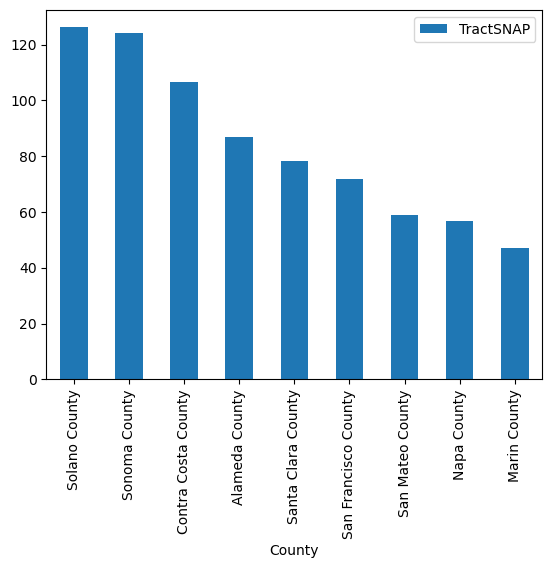

In [24]:
county_snap = new_fa.groupby(
    new_fa['County'])[['TractSNAP']].mean().sort_values(by='TractSNAP', ascending=False)
county_snap.plot(kind='bar')

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Part 6 Interpretation of Data**

For the food access dataset, I mainly looked at the low income tracts that are indicated by either a 1 or 0. A 1 indicates that the census tract is low income while 0 states that it is not considered low-income. From the data analysis and visuals, indicated low income census tracts in Sonoma County, Solano County, San Mateo County, and Contra Costa County are the top four counties that have  an average of over 200 housing units participating in SNAP. Napa county has an average of less than 100 housing units in SNAP. We also note that census tracts that are not considered low income over average have about 40 to 100 across all counties that participate in SNAP. Also in this initial analysis, “lapop1” refers to the population count that is more than 1 mile away from a supermarket and “lapop10” is the population count that is more than 10 miles away from a supermarket. San Francisco is the only county that has less than 250 people that are more than 1 mile away from a grocery store, and has 0 people that are more than 10 miles away from a supermarket. This can be due to the density of the city. The counties that have over 1,700 people that are more than 1 mile away from a super market are Contra Costa County, Solano County, and Sonoma County. However, when we place the parameter of laptop 10. San Mateo County is ranked the highest with over 1,400 that are more than 10 miles away from a supermarket. This amount is more than twice the amount compared to other counties. 

 **Part 7** 


Our research questions consist of where are these food deserts are located, what are the demographics and neighborhood characteristics surrounding these food deserts, how are they accessing these areas (public transportation/vehicles/etc.)and how might this impact them?

Also seeing where fast food locations are and seeing if they were closer to non healthy or health options.
Additionally maybe looking further into food assistance programs. "How does the spatial distribution of SNAP #participation intersect with transportation limitations in the bay area, and what impact does this intersectionality have on food access and the existence of food deserts within these communities?"

This question aims to explore the relationship between SNAP participation, lack of vehicle access, and the availability of healthy food options. It considers the context of the bay area, acknowledging that transportation challenges may differ between these settings since different counties have different transportation networks. The analysis could involve mapping the distribution of SNAP participants, identifying areas with limited vehicle access, and assessing the correlation with the presence of food deserts. This research question has the potential to uncover insights into the complex interplay of socio-economic factors affecting food accessibility in specific communities.



In [8]:
import pandas as pd
import pandas
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint 
pp = pprint.PrettyPrinter()

In [55]:
#Make an API requests
#I won't be using this API since I have not been able to find one I want to use for my project
#Using this API as an excerise for this assignment, thus this is why I listed it at the very bottom to demonstrate
#that I understand how to use an API source
endpoint_url = " https://data.sfgov.org/resource/tpp3-epx2.json"

In [56]:
data = requests.get(endpoint_url).json()

In [57]:
df = pd.DataFrame.from_dict(data)

In [72]:
df.head()


,campus_name,ccsf_entity,lower_grade,upper_grade,grade_range,category,map_label,lower_age,upper_age,general_type,...,supervisor_district,county_fips,county_name,location_1,:@computed_region_fyvs_ahh9,:@computed_region_bh8s_q3mv,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,cds_code
0,"Milk, Harvey Milk Childrens Center",SFUSD,-2,-1,PK,USD PreK,CDC095,3,4,CDC,...,6,06075,SAN FRANCISCO,"{'latitude': '37.783802', 'longitude': '-122.4...",36,28858,7,9,9,NaN
1,Mckinley Elementary School,SFUSD,0,5,K-5,USD Grades K-5,PS075,5,10,PS,...,8,06075,SAN FRANCISCO,"{'latitude': '37.766884', 'longitude': '-122.4...",3,28862,15,5,5,38684786041420
2,Jewish Community Center San Francisco - Rosenb...,Private,-2,-1,PK,Independent / Private,CDC058,3,4,CDC,...,1,06075,SAN FRANCISCO,"{'latitude': '37.784588', 'longitude': '-122.4...",11,54,11,6,2,380504700
3,Eureka Learning Center,Private,-2,-1,PK,Independent / Private,CDC035,3,4,CDC,...,8,06075,SAN FRANCISCO,"{'latitude': '37.754967', 'longitude': '-122.4...",22,28862,2,4,5,38684787044605
4,Noriega Early Education School,SFUSD,-2,5,PK-5,USD PreK/TK-5,PS085,3,10,PS,...,4,06075,SAN FRANCISCO,"{'latitude': '37.753834', 'longitude': '-122.5...",35,56,1,8,3,38684780117473


In [82]:
#Dropping all Missing Values
cleaned_df = df.dropna()
cleaned_df.describe()
#however most of the data here are all categorical so creating a visual at the moment is not possible since it needs a numeric/datetime value

,campus_name,ccsf_entity,lower_grade,upper_grade,grade_range,category,map_label,lower_age,upper_age,general_type,...,supervisor_district,county_fips,county_name,location_1,:@computed_region_fyvs_ahh9,:@computed_region_bh8s_q3mv,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,cds_code
count,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,394,394,394,394,394,394
unique,389,2,14,10,27,22,394,14,10,3,...,11,1,1,394,38,24,14,10,11,387
top,Cornerstone Academy,Private,-2,-1,PK,Independent / Private,PS075,3,4,CDC,...,5,06075,SAN FRANCISCO,"{'latitude': '37.766884', 'longitude': '-122.4...",19,28859,1,8,11,38684786089775
freq,3,268,201,145,146,268,1,199,145,148,...,47,394,394,1,36,38,63,69,47,2
